# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [5]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
display(data[:18].T)  # print the first 18 rows as a transpose table

Dataset has 440 rows, 6 columns


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Fresh,12669,7057,6353,13265,22615,9413,12126,7579,5963,6006,3366,13146,31714,21217,24653,10253,1020,5876
Milk,9656,9810,8808,1196,5410,8259,3199,4956,3648,11093,5403,1124,12319,6208,9465,1114,8816,6157
Grocery,7561,9568,7684,4221,7198,5126,6975,9426,6192,18881,12974,4523,11757,14982,12091,3821,12121,2933
Frozen,214,1762,2405,6404,3915,666,480,1669,425,1159,4400,1420,287,3095,294,397,134,839
Detergents_Paper,2674,3293,3516,507,1777,1795,3140,3321,1716,7425,5977,549,3881,6707,5058,964,4508,370
Delicatessen,1338,1776,7844,1788,5185,1451,545,2566,750,2098,1744,497,2931,602,2168,412,1080,4478


## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Feature variance is one of the first details about the dataset that will become clear once the first set of computations are done. In addition to feature variance, the PCA and ICA calculations will also indicate which features share a high degree of mutual information with other features. For example, from the initial view of data above it appears that the 'Frozen' feature has a variance. This is clear as the values range from low 100s to mid 1000s in terms of their order of magnitude. Upon a closer inspection, it is also clear that the 'Fresh' feature has a high variance though it less obvious as the values of that feature have a higher order of magnitude. In fact, the variance for 'Fresh' will be greater than that of 'Frozen' because of their difference in order of magnitude. What is more important to consider is that high values of 'Fresh' are likely to be paired with low values of 'Frozen' and vice versa as conceptually those two features are related to each other and opposite. This suggests that these two features share a high degree of mutual information which leads to the assumption that one but probably not both features are likely to be useful in determining clusters within the data.

### PCA

In [111]:
import seaborn as sns
# Using a heatmap to visualise PCA and ICA matrices is inspired by this post on UDacity:
# https://discussions.udacity.com/t/having-trouble-with-pca-and-ica-specifically-with-explaining-what-the-dimensions-mean/41890/18?u=eminnett
def plot_heatmap(data, y_labels, x_labels):
    y_labels = list(reversed(y_labels))
    x_labels = list(x_labels)
    ax = sns.heatmap(data, annot=True, cmap="RdYlGn")
    ax.set_xticklabels(x_labels, rotation=30)
    ax.set_yticklabels(y_labels, rotation=0)
    sns.plt.show()

In [114]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(data)

# Print the components and the amount of variance in the data contained in each dimension
pca_components = pca.components_
print "PCA Components:"
print pca_components
print "\n"
print "PCA Explained Variances:"
print pca.explained_variance_ratio_

PCA Components:
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]


PCA Explained Variances:
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Based on the values of the explained variance, it is clear that the first two dimensions explain the large majority (more than 85%) of the data variance. By comparison, the third dimension only explains 7% of the variance. From this, it would make sense to do further analysis using only the first dimensions. The process of selecting only the two most representative principle components is a form of dimenionality reduction. In effect, we can extract those features that explain the large majority of the variance and shape of the data while filtering out what is likely to be a fair amount of noise [1].

**3)** What do the dimensions seem to represent? How can you use this information?

PCA Components Heatmap:


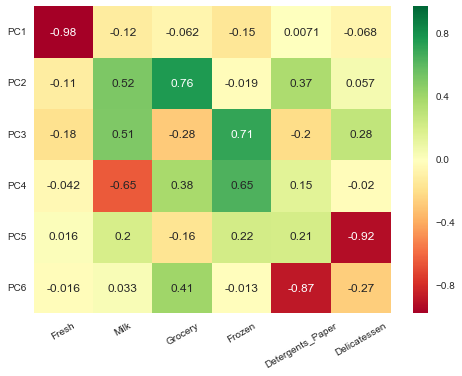

In [115]:
print "PCA Components Heatmap:"
plot_heatmap(pca_components, ['PC1','PC2','PC3','PC4','PC5','PC6'], list(data.columns.values))

**PC1**: The coefficient of this eigenvector with the largest absolute value by far represents 'Fresh' food of the food being purchased. This suggests that the first principle component represents the 'freshness' of the food purchased. 

**PC2**: The three coefficients with the largest absolute values represent 'Milk', 'Grocery' and 'Detergents / Paper' products. It is a little harder to interpret this vector compared to the clarity of the 'freshness' vector, but the combination of 'Milk' and 'Grocery' could be interpreted as the basic products a consumer might purchase as their standard fare. In essence the idomatic 'bread and butter'.

**PC3**: The two primary coefficients for this eigenvector represent 'Milk' and 'Frozen'. It is not clear what this principle component represents apart from being a corllary of the second principle component but instead of the standard fare including non-food products, frozen products are purchased instead.

**PC4**: Even though this eigenvector shares the similar primary coefficient variables as the third principle component, there is an important distinction. The coefficient of the 'Milk' coefficient is opposite to that of the 'Frozen' coefficient. This suggests that the principle component captues the concept of 'long lasting' products.

**PC5**: Like that of the first principle component, this eigenvector has a single dominant coefficient. This coefficient represents 'Delicatessan' products. This suggests that this principle component represents the 'meat' of the food purchased. It is no surprise that ther is a single principle component representing 'meat' as not all consumers will purchase meat.

**PC6**: Though less dominant than that of the first and fifth principle components, there is still one dominant coefficient and that is the one that rpresents 'Detergents / Paper' products. One clear way to interpret this principle component is as a represnetation of 'non-food' products.

Ultimately, there is great value in understanding these underlying conceptual trends within the data. Even though some of these components marry nicely with individual variables in the data, some of the others reprent concpet that would be very hard to attribute to a single variable. By extracting these new concept driven fetaures, we are able to analyse trends that would be hard to isolate from the individual variables alone [2].

### ICA

In [126]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA

centered_normalised_data = (data - data.mean())/data.std(axis=0)

ica = FastICA(random_state=42)
ica.fit_transform(centered_normalised_data)

# Print the independent components
ica_components = ica.components_
print "ICA Components:"
print ica_components

ICA Components:
[[-0.01092072 -0.00108702  0.00731609  0.05411747 -0.00254425 -0.01677584]
 [ 0.00254077 -0.01234233  0.06920747  0.00142537 -0.01376418 -0.00544717]
 [-0.00491164 -0.00154072 -0.00562786 -0.00252788  0.00238715  0.05098745]
 [-0.00336665  0.01865122  0.1091143  -0.00724067 -0.13353828 -0.01604104]
 [-0.05032368  0.0064794   0.00749098  0.00322781 -0.01148445  0.00271098]
 [-0.00194074 -0.07253711  0.05654051  0.0016755  -0.01715991  0.01697522]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

ICA Components Heatmap (in standard deviations):


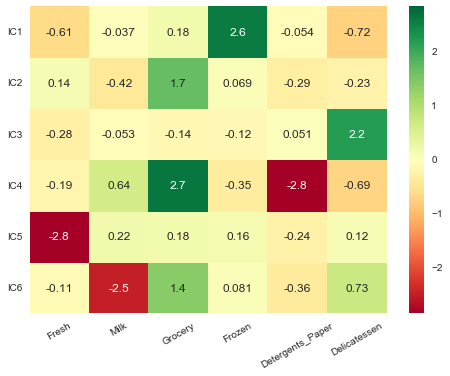

In [127]:
print "ICA Components Heatmap (in standard deviations):"
sd_ica_components = ica_components / ica_components.std(axis=0)
plot_heatmap(sd_ica_components, ['IC1','IC2','IC3','IC4','IC5','IC6'], list(data.columns.values))

Above is a heatmap of the 6 independent components where the values have been converted into standard deviations. This conversion helps highlight the relative magnitude of each coefficient aiding the analysis of what each independent component represents conceptually.

**IC1**: The coefficient of this independent component with the largest value by far represents 'Frozen' food of the food being purchased. This suggests that this independent component represents the 'long lasting' products.

**IC2**: The coefficient of this independent component with the largest value by far represents 'Grocery' products being purchased. From the description of the data, it is not clear which products are categorised as 'Grocery'. This ambiguity makes the interpretation of this independent component a bit more difficult, but a fair interpretation could be 'standard fare' products.

**IC3**: Like that of the first independent component, this vector has a single dominant coefficient. This coefficient represents 'Delicatessan' products. This suggests that this independent component represents the 'meat' of the food purchased.

**IC4**: This independent component is similar to the second as the 'Grocery' variable has a large coefficient, though unlike the second independent component this one also has a large negative coefficinet for the 'Detergents / Paper' variable. It is not entirely clear what this represents, but one interpretation is 'standard fare without non-food' products.

**IC5**: The coefficient of this independent component with the largest absolute value by far represents 'Fresh' food of the food being purchased. This suggests that this independent component represents the 'freshness' of the food purchased. Interstingly, this independent component is very similar to the first principle component.

**IC6**: The coefficients for this independent component include a large negative coefficient for 'Milk' and smaller positive coefficients for 'Grocery' and 'Delicatessen' products. One way to interpret these coefficients is 'meat and standard far for the lactose intollerant'.

**NB**: It is surprising that IC1 and IC5 are orthogonal as the initial review of the data suggested that the 'Fresh' and 'Frozen' variables are linearly dependent.

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [ ]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [ ]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = ?
print reduced_data[:10]  # print upto 10 elements

In [ ]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = ?
print clusters

In [ ]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = ?
print centroids

In [ ]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

**9)** How would you use that technique to help the company design new experiments?

Answer: 

**10)** How would you use that data to help you predict future customer needs?

Answer: 

### References

[1] Wikipedia contributors, "Dimensionality reduction," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Dimensionality_reduction&oldid=708204276 (accessed March 10, 2016).

[2] Wikipedia contributors, "Feature extraction," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Feature_extraction&oldid=707749648 (accessed March 10, 2016).

